## Anomaliedetektion


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [9]:
vegetable_df = pd.read_csv('output_anomalie.csv', index_col=0)

In [10]:
vegetable_df.head()

,contour number,aspect ratio,extent,Blue,Green,Red,Hue,class
0,27,0.465992,0.758486,89.418293,161.890244,154.832927,33.164634,0
1,33,0.773585,0.751266,73.689918,73.168230,83.978312,151.097304,0
2,42,0.291139,0.638797,64.900421,134.379383,144.981066,15.561010,0
3,37,0.948718,0.816701,46.118971,116.155949,132.356913,15.137460,0
4,67,0.563427,0.761712,31.994382,121.905899,130.504213,16.797753,0


In [11]:
# zusatz = pd.DataFrame([[3.2,1.8,3.2,2.7,3, 2, 7, 4]],columns=['contour number',
#                                                             'aspect ratio',
#                                                             'extent',
#                                                             'Blue',
#                                                             'Green',
#                                                             'Red',
#                                                             'Hue',
#                                                             'class'])

In [12]:
#zusatz.head()

In [13]:
#vegetable_df_ext = vegetable_df
#print(type(vegetable_df))

In [14]:
#vegetable_df_ext = vegetable_df.append(zusatz, ignore_index=True)

In [15]:
#vegetable_df_ext.shape
vegetable_df.shape

(3559, 8)

In [16]:
#vegetable_df_ext.tail()
vegetable_df.tail()

,contour number,aspect ratio,extent,Blue,Green,Red,Hue,class
3554,23,0.538769,0.726544,65.074178,103.116432,75.296714,59.400939,3
3555,16,0.700059,0.750232,46.530015,86.325037,69.913616,35.127379,3
3556,15,0.640312,0.777355,54.340304,91.417300,69.146388,48.591255,3
3557,13,0.714267,0.730993,65.396621,99.510861,84.814964,47.781979,3
3558,14,0.884783,0.703736,89.282908,130.447937,84.337917,86.218075,3


In [17]:
#vegetable_df_ext.describe()
vegetable_df.describe()

,contour number,aspect ratio,extent,Blue,Green,Red,Hue,class
count,3559.000000,3559.000000,3559.000000,3559.000000,3559.000000,3559.000000,3559.000000,3559.000000
mean,48.777747,0.638801,0.787277,53.552779,110.445374,112.337145,24.837627,1.246418
std,53.361751,0.270316,0.056901,22.972548,27.571935,29.948234,25.518328,0.965232
min,4.000000,0.076460,0.504830,6.637555,49.657277,24.891892,3.583333,0.000000
25%,21.000000,0.422717,0.761717,37.347401,91.632825,92.386121,13.970323,0.000000
50%,32.000000,0.710813,0.793668,49.480137,102.714013,109.245968,17.221239,1.000000
75%,52.000000,0.861332,0.820034,63.351553,123.558878,128.220978,25.297144,2.000000
max,436.000000,1.000000,1.051157,164.461202,228.727273,198.261157,176.118644,3.000000


Scatterplot von 2 Merkmalen: Shaftblattlänge zu Breite
Verschiedene Species unterschiedlich einfärben
--> Klassifikationsmöglichkeit beurteilen


In [18]:
colors = {'setosa':'r','versicolor':'g','virginica':'b','other':'m'} # Farben für Kategorien

KeyError: 'sepal_length'

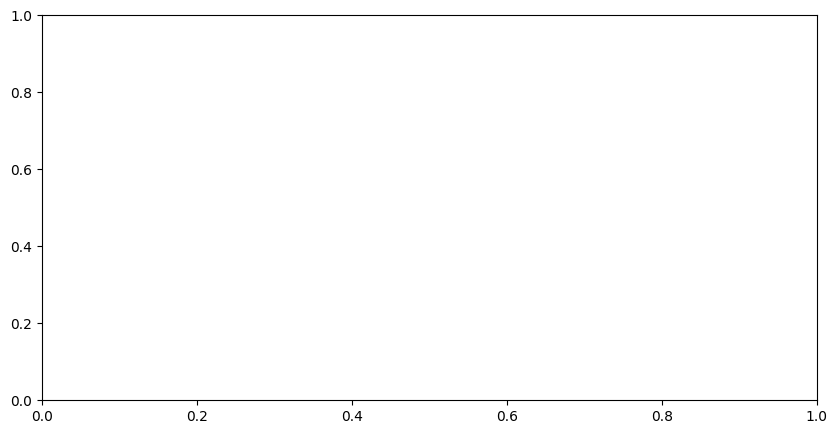

In [20]:
fig, ax = plt.subplots(figsize=(10,5)) #Größe Plot  konfigurieren

for i  in range(len(vegetable_df['sepal_length'])):
    ax.scatter(vegetable_df['sepal_length'][i],
               vegetable_df['sepal_width'][i],
               color=colors[vegetable_df['species'][i]])
    
ax.set_title('Gemüse Daten')
ax.set_xlabel('Sepal_length')
ax.set_ylabel('Sepal_Width')

Klassen statt mit Namen mit Zahlen bezeichnen


In [ ]:
species_to_int ={'setosa':0,'versicolor':1, 'virginica':2, 'other':3} # Für jede Klasse eindeutige Zahl setzen

vegetable_df_ext['species']=vegetable_df_ext['species'].map(species_to_int) # Klassenspalte überschreiben mit Zahlen
vegetable_df_ext.head()

Daten nach Merkmalsmatrix und Ergebnisvektor (Klassifikation) trennen


In [ ]:
X = vegetable_df_ext.iloc[:,:-1] #alles außer letzter Spalte
y = vegetable_df_ext.iloc[:,-1] #nur letzte Spalte

In [ ]:
X.shape

In [ ]:
X.head()

In [ ]:
print('Ergebnisspaltengroesse: ',y.shape)

IsolationForest


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
iForest_clf = IsolationForest(random_state=0).fit(X)

In [ ]:
Xzusatz=vegetable_df_ext.iloc[150:,:-1]

In [ ]:
Xzusatz.head()

In [ ]:
iForest_clf.predict(Xzusatz) #Vorhersage., ob Outlier oder nicht

K-means-Clustering


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Xfeld = X.values

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
y_pred=kmeans.fit_predict(X)

In [ ]:
y_pred

In [ ]:
y_pred is kmeans.labels_

In [ ]:
kmeans.cluster_centers_

DBScan


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [ ]:
XMoons, yMoons = make_moons(n_samples=1000, noise=0.5)
dbscan=DBSCAN(eps=0.15, min_samples=5) # Spiele mit eps-Wert (start bei 0.05)
dbscan.fit(XMoons)

In [ ]:
dbscan.labels_